<a href="https://colab.research.google.com/github/acts701/Audio/blob/main/241028_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}')

In [3]:
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,3]
plt.rcParams['font.size'] = '8'

keras.__version__

'3.4.1'

In [5]:
level_of_noise = 0.7

In [6]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train/255, x_test/255
x_train_f = x_train.reshape(-1, 28*28)
x_test_f = x_test.reshape(-1, 28*28)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_train_f.shape))
x_train_f_n = x_train_f + noise
x_train_f_n = np.clip(x_train_f_n, 0, 1)

noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_test_f.shape))
x_test_f_n = x_test_f + noise
x_test_f_n = np.clip(x_test_f_n, 0, 1)

# plt.imshow(x_trainNoise[0].reshape(28,28))
# pst(x_train) Shape(60000, 28, 28)
# pst(y_train) Shape(60000,)
# pst(x_test) Shape(10000, 28, 28),
# pst(y_test) Shape(10000,)
# pst(noise) Shape(10000, 784)
# pst(x_trainNoise) Shape(60000, 784)
# print(y_train[0])
# plt.imshow(x_train[0].reshape(28,28))
# pst(x_train2D) ape(60000, 784)

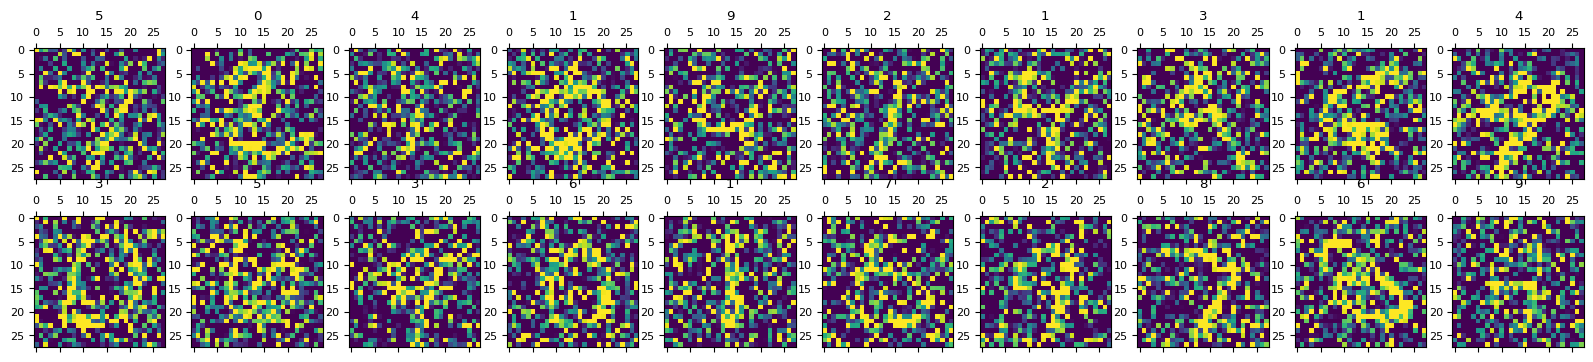

In [7]:
# fig, axs = plt.subplots(2, 10, sharey=False, tight_layout=True, figsize=(20,4), facecolor='white')
fig, axs = plt.subplots(2, 10, figsize=(20,4))

n = 0
for i in range(0,2):
    for j in range(0,10):
        axs[i,j].matshow(x_test_f_n[n].reshape(28,28))
        axs[i,j].set(title = y_train[n])
        n=n+1
plt.show()

In [8]:
def f_ModelAcc():
    modelAcc = keras.models.Sequential([
        keras.Input(shape=[28,28,1]),
        layers.Conv2D(128, 3, padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(256,3,padding='same'),
        layers.Activation('relu'),
        layers.MaxPool2D(2,2),
        layers.Conv2D(128,3,padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Flatten(name='flatten'),
        layers.Dense(10, activation='softmax')
    ])
    modelAcc.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy', metrics=['acc'])
    return modelAcc

In [9]:
modelAcc = f_ModelAcc()
history = modelAcc.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - acc: 0.9246 - loss: 0.2484 - val_acc: 0.9679 - val_loss: 0.2179
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9891 - loss: 0.0354 - val_acc: 0.9889 - val_loss: 0.0328
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9933 - loss: 0.0211 - val_acc: 0.9871 - val_loss: 0.0416
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.9947 - loss: 0.0162 - val_acc: 0.9904 - val_loss: 0.0304
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - acc: 0.9962 - loss: 0.0122 - val_acc: 0.9791 - val_loss: 0.0679


In [10]:
x_train_n_2D = x_train_f_n.reshape(-1,28,28)
x_test_n_2D = x_test_f_n.reshape(-1,28,28)

modelNoise = f_ModelAcc()
historyNoise = modelNoise.fit(x_train_n_2D, y_train, batch_size=128, epochs=5, validation_data=(x_test_n_2D, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - acc: 0.7575 - loss: 0.7757 - val_acc: 0.8787 - val_loss: 0.4266
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9215 - loss: 0.2370 - val_acc: 0.9188 - val_loss: 0.2558
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9398 - loss: 0.1842 - val_acc: 0.8927 - val_loss: 0.3365
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9528 - loss: 0.1442 - val_acc: 0.9083 - val_loss: 0.3053
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9638 - loss: 0.1120 - val_acc: 0.9230 - val_loss: 0.2448


In [11]:
_, acc = modelAcc.evaluate(x_test, y_test)
print(f'normal train, normal test = {acc*100:.3f}%')
_, acc = modelAcc.evaluate(x_test_n_2D, y_test)
print(f'normal train, noisy test = {acc*100:.3f}%')
_, acc = modelNoise.evaluate(x_test, y_test)
print(f'noisy train, normal input = {acc*100:.3f}%')
_, acc = modelNoise.evaluate(x_test_n_2D, y_test)
print(f'noisy train, noisy test = {acc*100:.3f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9766 - loss: 0.0781
normal train, normal test = 97.910%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1151 - loss: 8.2251
normal train, noisy test = 11.820%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9756 - loss: 0.0888
noisy train, normal input = 98.050%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9060 - loss: 0.2996
noisy train, noisy test = 92.300%


In [12]:
latentDim = 10

In [13]:

from keras.constraints import max_norm

def AE():
    input = layers.Input(shape=(784,))
    x = layers.Dense(128, activation='relu', kernel_constraint=max_norm(2.))(input)
    x = layers.Dense(64, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(latentDim, activation='linear', kernel_constraint=max_norm(2.),name='enc')(x)

    x = layers.Dense(32, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(128, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(784, activation='sigmoid', kernel_constraint=max_norm(2.),name='dec')(x)
    return keras.Model(input, x)

model = AE()
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ enc (Dense)                          │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec (Dense)                          │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 215,098 (840.23 KB)

 Trainable params: 215,098 (840.23 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs=50
batchsize=512
model = AE()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [15]:
result1 = model.fit(x_train_f_n, x_train_f_n, epochs=epochs, batch_size=batchsize, validation_data=(x_test_f_n, x_test_f_n))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1484 - val_loss: 0.1359
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1348 - val_loss: 0.1321
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1316 - val_loss: 0.1300
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1297 - val_loss: 0.1291
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1290 - val_loss: 0.1287
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1287 - val_loss: 0.1284
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1284 - val_loss: 0.1283
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1283 - val_loss: 0.1282
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1281 - val_loss: 0.1280
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1280 - val_loss: 0.1279
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1279 - val_loss: 0.1278
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

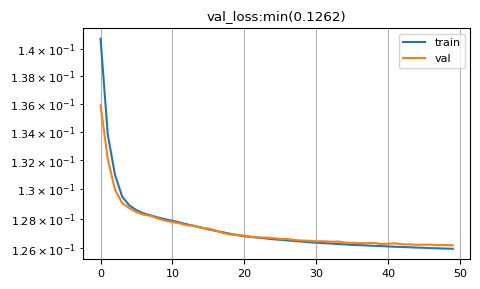

In [16]:
hist = result1.history
plt.title(f"val_loss:min({min(hist['val_loss']):0.4f})")
plt.plot(hist['loss'], label='train')
plt.plot(hist['val_loss'], label='val')
plt.semilogy()
plt.grid()
plt.legend()
plt.show()

In [17]:
decoded_imgs = []
decoded_imgs.append(model.predict(x_test_f_n[0:20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


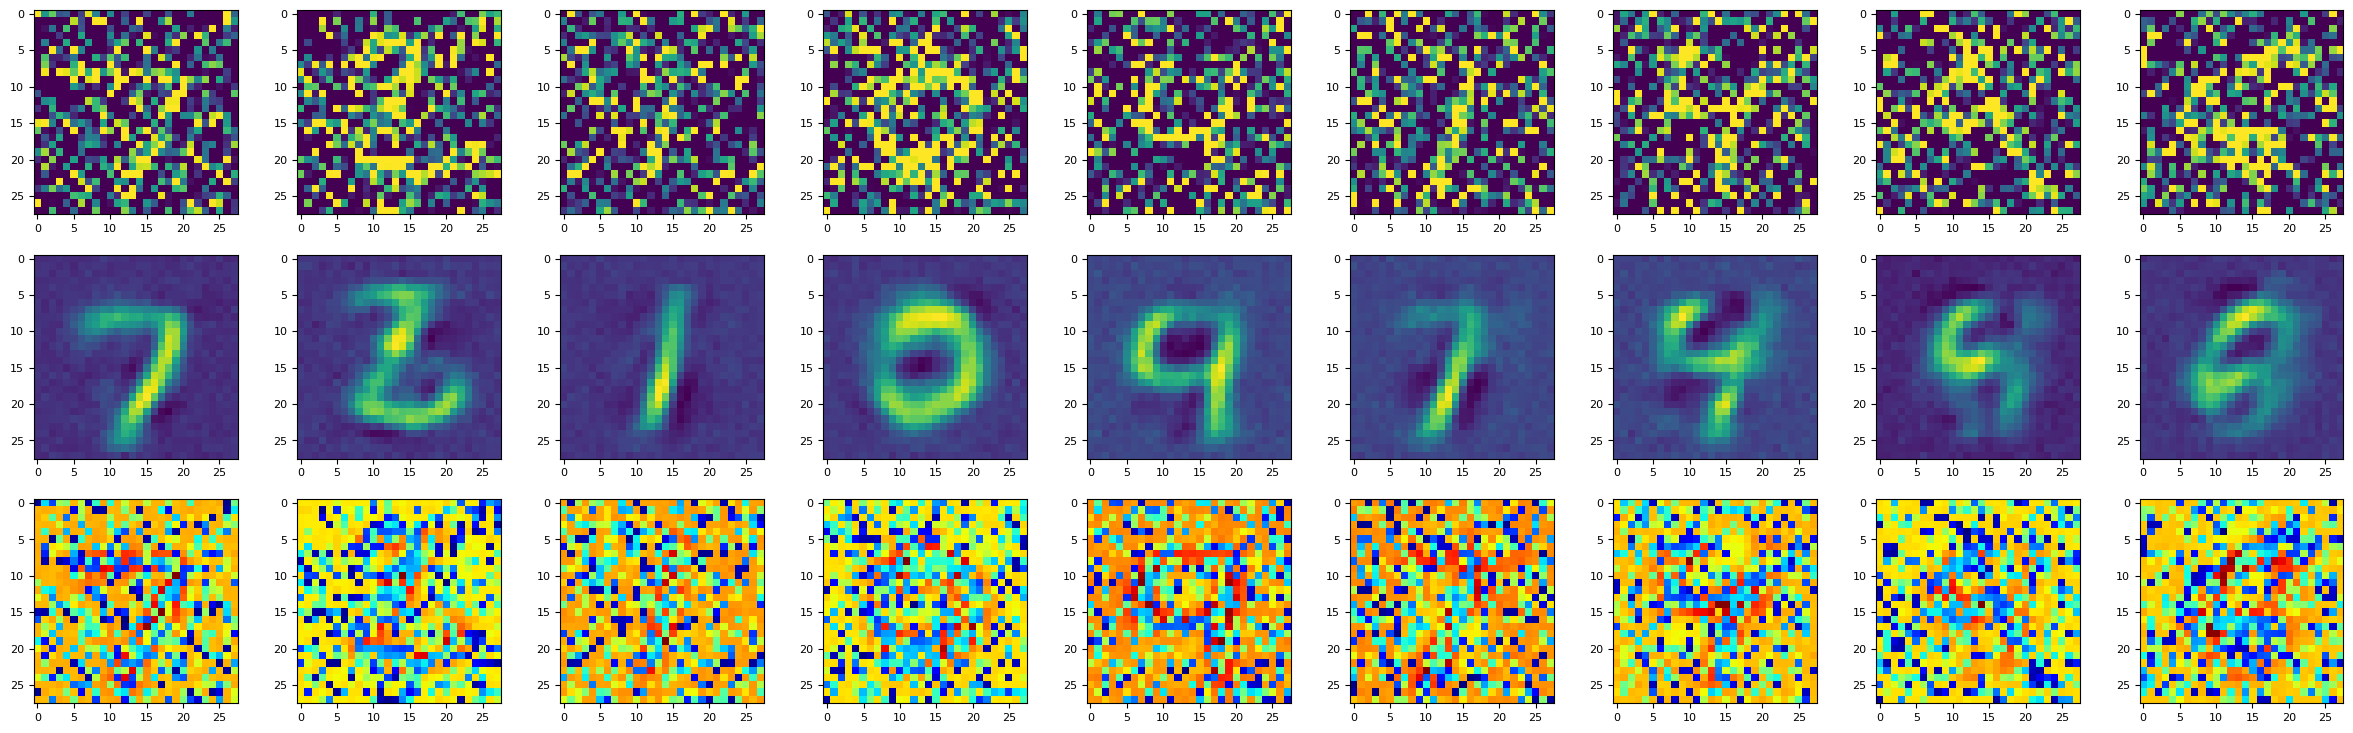

In [18]:
num_imgs=9
n_row=3

plt.figure(figsize=(30,9))
for i in range(n_row):
    for j in range(num_imgs):
        if 0 == i:
            plt.subplot(n_row, num_imgs, j+1)
            pltImg = x_test_f_n[j].reshape(28,28)
            plt.imshow(pltImg)
        if 1 == i:
            plt.subplot(n_row, num_imgs, num_imgs+j+1)
            pltImg = decoded_imgs[0][j].reshape(28,28)
            plt.imshow(pltImg)
        else:
            plt.subplot(n_row, num_imgs, 2*num_imgs+j+1)
            pltImg = (decoded_imgs[0][j]-x_test_f_n[j]).reshape(28,28)
            plt.imshow(pltImg, cmap='jet')
plt.show()

In [19]:
decoded_imgs_p = model.predict(x_test_f_n)
decoded_imgs = decoded_imgs_p.reshape(-1,28,28)

_, acc = modelAcc.evaluate(x_test, y_test)
print(f"normal train normal input : {acc*100:.3f}%")
_, acc = modelAcc.evaluate(x_test_n_2D, y_test)
print(f"normal train noisy input : {acc*100:.3f}%")
_, acc = modelAcc.evaluate(decoded_imgs, y_test)
print(f"normal train decoded input : {acc*100:.3f}%")

_, acc = modelNoise.evaluate(x_test, y_test)
print(f"noise train normal input : {acc*100:.3f}%")
_, acc = modelNoise.evaluate(x_test_n_2D, y_test)
print(f"noise train noise input : {acc*100:.3f}%")
_, acc = modelNoise.evaluate(decoded_imgs, y_test)
print(f"noise train decoded input : {acc*100:.3f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9766 - loss: 0.0781
normal train normal input : 97.910%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.1151 - loss: 8.2251
normal train noisy input : 11.820%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.4962 - loss: 1.6583
normal train decoded input : 51.270%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9756 - loss: 0.0888
noise train normal input : 98.050%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9060 - loss: 0.2996
noise train noise input : 92.300%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7546 - loss: 0.7346
noise train decoded input : 77.670%


In [20]:
level_of_bias = 0.3
level_of_noise = 0.2

[] Shape(60000, 784)


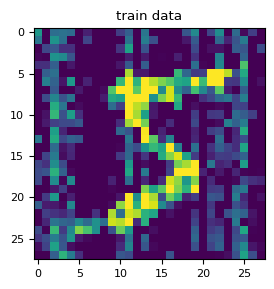

In [21]:

biasNoise = level_of_bias * np.random.normal(loc=0.0, scale=1.0, size=(x_train.shape[0], 28))
biasNoiseExpanded = np.tile(biasNoise, (1,28))
x_train_n = x_train_f + biasNoiseExpanded
noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_train_f.shape))
x_train_n = x_train_n + noise
x_train_n = np.clip(x_train_n, 0, 1)

ps(x_train_n)
plt.title('train data')
plt.imshow(x_train_n[0].reshape(28,28))
plt.show()

[] Shape(10000, 784)


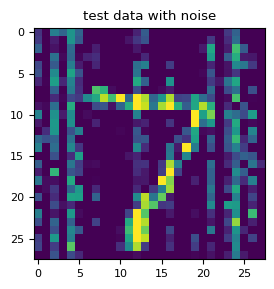

In [22]:
biasNoise = level_of_bias * np.random.normal(loc=0.0, scale=1.0, size=(x_test.shape[0], 28))
biasNoiseExpanded = np.tile(biasNoise, (1,28))
x_test_n = x_test_f + biasNoiseExpanded
noise = level_of_noise * np.random.normal(loc=0.0, scale=1.0, size=(x_test_f.shape))
x_test_n = x_test_n + noise
x_test_n = np.clip(x_test_n, 0, 1)

ps(x_test_n)
plt.title('test data with noise')
plt.imshow(x_test_n[0].reshape(28,28))
plt.show()

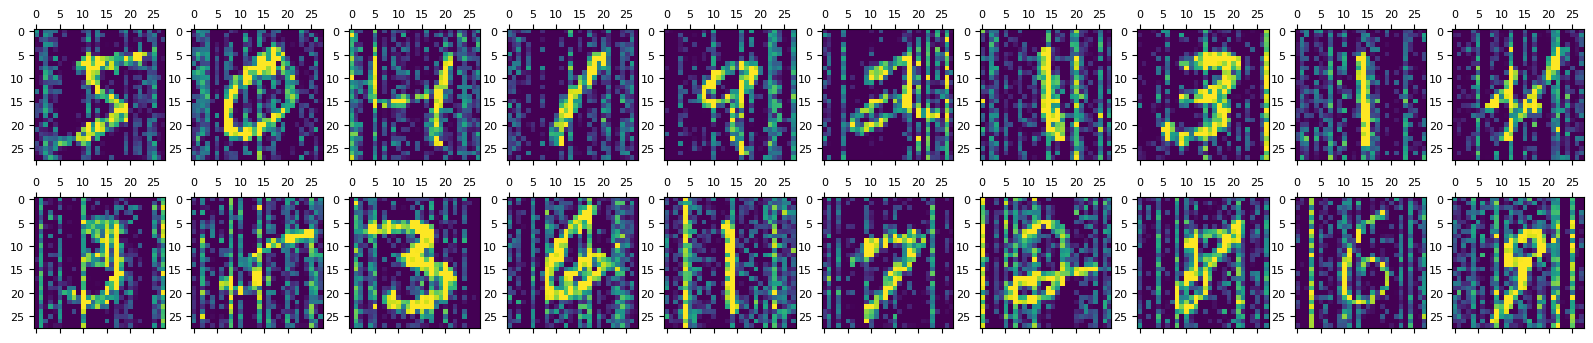

In [24]:
fig, axs = plt.subplots(2,10,figsize=(20,4))
n=0
for i in range(0,2):
    for j in range(0,10):
        axs[i,j].matshow(x_train_n[n].reshape(28,28))
        n=n+1
plt.show()

In [23]:
x_train_n_2d = x_train_n.reshape(-1,28,28)
x_test_n_2d = x_test_n.reshape(-1,28,28)
modelNoise = f_ModelAcc()
result = modelNoise.fit(x_train_n_2d, y_train, epochs=5, batch_size=128, validation_data=(x_test_n_2d, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - acc: 0.8652 - loss: 0.4668 - val_acc: 0.8041 - val_loss: 0.5667
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9815 - loss: 0.0635 - val_acc: 0.9802 - val_loss: 0.0629
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9885 - loss: 0.0377 - val_acc: 0.9827 - val_loss: 0.0547
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - acc: 0.9916 - loss: 0.0266 - val_acc: 0.9800 - val_loss: 0.0651
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.9948 - loss: 0.0183 - val_acc: 0.9830 - val_loss: 0.0575


In [25]:
_, acc = modelAcc.evaluate(x_test, y_test, verbose=0)
print(f"normal train normal input = {acc*100:.3f}%")
_, acc = modelAcc.evaluate(x_test_n_2d, y_test,verbose=0)
print(f"normal train noisy input = {acc*100:.3f}%")
_, acc = modelNoise.evaluate(x_test, y_test, verbose=0)
print(f"Noise train normal input = {acc*100:.3f}%")
_, acc = modelNoise.evaluate(x_test_n_2d, y_test,verbose=0)
print(f"Noise train noisy input = {acc*100:.3f}%")

normal train normal input = 97.910%
normal train noisy input = 75.810%
Noise train normal input = 98.780%
Noise train noisy input = 98.300%


In [29]:

result2 = model.fit(x_train_n, x_train_n, epochs=epochs, batch_size = batchsize, validation_data=(x_test_n, x_test_n))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0595 - val_loss: 0.0573
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0577 - val_loss: 0.0571
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0573 - val_loss: 0.0569
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0571 - val_loss: 0.0568
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0569 - val_loss: 0.0566
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0568 - val_loss: 0.0565
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0567 - val_loss: 0.0564
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0565 - val_loss: 0.0564
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0565 - val_loss: 0.0563
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0563 - val_loss: 0.0562
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0563 - val_loss: 0.0562
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

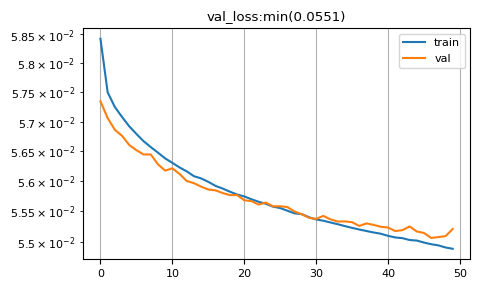

In [31]:
hist = result2.history
plt.title(f"val_loss:min({min(hist['val_loss']):0.4f})")
plt.plot(hist['loss'], label='train')
plt.plot(hist['val_loss'], label='val')
plt.semilogy()
plt.grid()
plt.legend()
plt.show()

In [32]:
decoded_imgs = []
decoded_imgs.append(model.predict(x_test_n[0:20]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


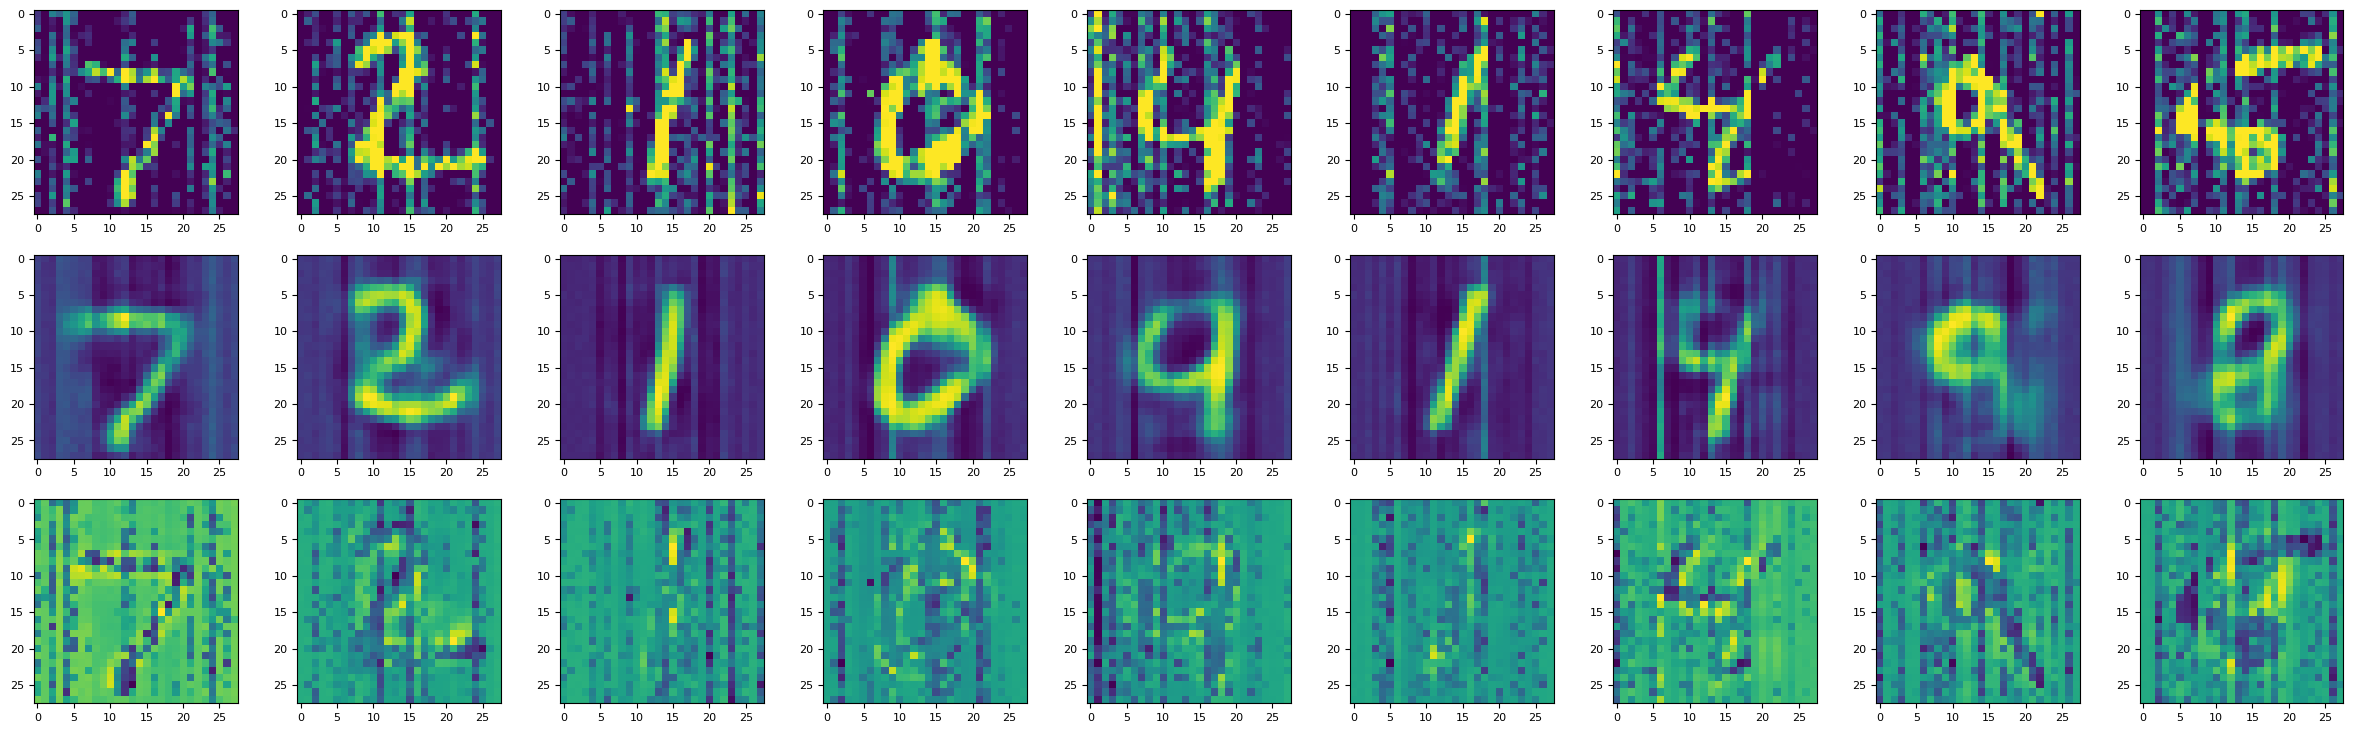

In [42]:

plt.figure(figsize=(30,9))
for i in range(n_row):
    for j in range(num_imgs):
        if i==0:
            plt.subplot(n_row, num_imgs, j+1)
            plot_img = x_test_n[j].reshape(28,28)
            plt.imshow(plot_img)
        if i==1:
            plt.subplot(n_row, num_imgs, num_imgs+j+1)
            plot_img = decoded_imgs[0][j].reshape(28,28)
            plt.imshow(plot_img)
        else:
            plt.subplot(n_row, num_imgs, num_imgs*2+j+1)
            plot_img = (decoded_imgs[0][j]-x_test_n[j]).reshape(28,28)
            plt.imshow(plot_img)

In [59]:
latent_dim=32
def AE02():
    input = layers.Input(shape=(784,))
    x = layers.Dense(128, activation='relu',kernel_constraint=max_norm(2.))(input)
    x = layers.Dense(64, activation='relu',kernel_constraint=max_norm(2.))(input)
    x = layers.Dense(64, activation='relu',kernel_constraint=max_norm(2.))(input)
    x = layers.Dense(latent_dim, activation='linear',kernel_constraint=max_norm(2.),name='en2')(x)
    x = layers.Dense(64, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(64, activation='relu', kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(128, activation='relu',kernel_constraint=max_norm(2.))(x)
    x = layers.Dense(28*28, activation='sigmoid',kernel_constraint=max_norm(2.),name='de2')(x)
    return keras.Model(input,x)

model = AE02()
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ en2 (Dense)                          │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ de2 (Dense)                          │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,048 (656.44 KB)

 Trainable params: 168,048 (656.44 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='mse')
result3 = model.fit(x_train_n, x_train_n, epochs=50, batch_size=512, validation_data=(x_test_n, x_test_n))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1156 - val_loss: 0.0812
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0785 - val_loss: 0.0705
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0686 - val_loss: 0.0628
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0619 - val_loss: 0.0578
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0573 - val_loss: 0.0552
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0549 - val_loss: 0.0529
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0528 - val_loss: 0.0515
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0515 - val_loss: 0.0502
Epoch 9/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0501 - val_loss: 0.0494
Epoch 10/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0493 - val_loss: 0.0485
Epoch 11/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0484 - val_loss: 0.0476
Epoch 12/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

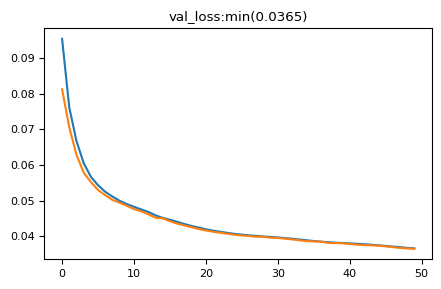

In [61]:
hist = result3.history
plt.title(f"val_loss:min({min(hist['val_loss']):0.4f})")
plt.plot(hist['loss'], label='train')
plt.plot(hist['val_loss'], label='val')
plt.show()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 7, 7, 8)             │           4,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoded (MaxPooling2D)               │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 8, 8, 64)            │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 28, 28, 1)           │           1,153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,953 (624.82 KB)

 Trainable params: 159,953 (624.82 KB)

 Non-trainable params: 0 (0.00 B)

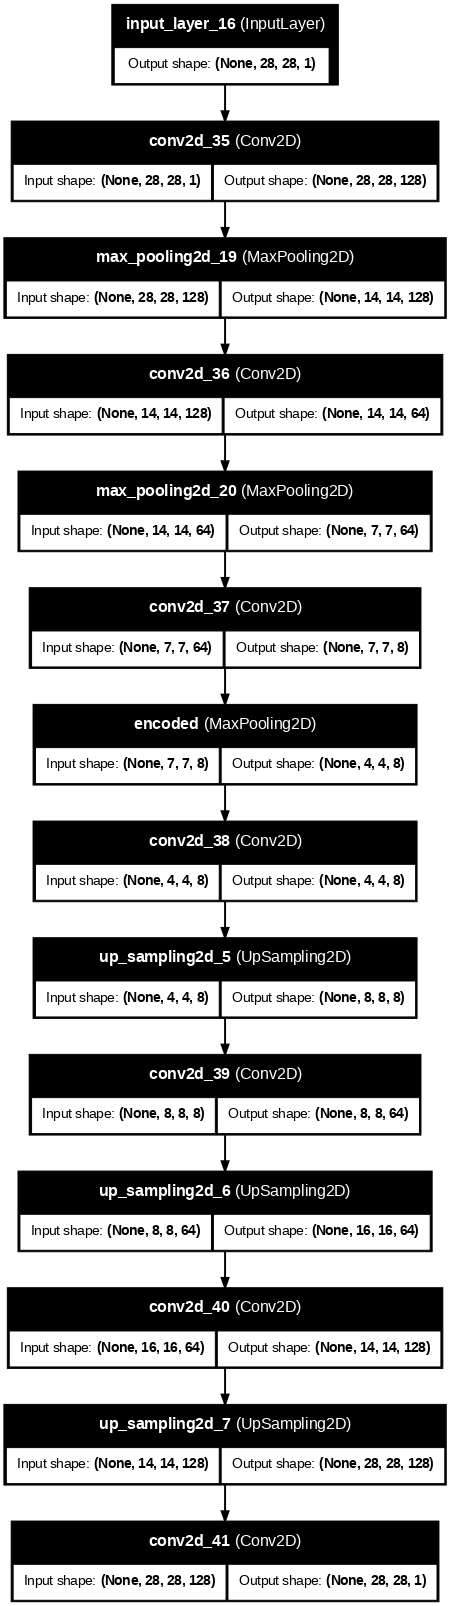

In [78]:
def AE_CONV():
    input = keras.layers.Input(shape=(28,28,1))
    x = layers.Conv2D(128, (3,3), activation='relu',padding='same')(input)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, (3,3), activation='relu',padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(8, (3,3), activation='relu',padding='same')(x)
    encoder = layers.MaxPooling2D(padding="same", name="encoded")(x)

    x = layers.Conv2D(8, (3,3), activation='relu', padding="same")(encoder)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding="same")(x)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.Conv2D(128, (3,3), activation='relu')(x)
    x = layers.UpSampling2D((2,2))(x)
    decoder = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
    model = keras.models.Model(inputs=input, outputs=decoder)
    return model

modelAeConv = AE_CONV()
modelAeConv.summary()
keras.utils.plot_model(modelAeConv, show_layer_names=True,show_shapes=True, dpi=70)

In [79]:
modelAeConv.compile(optimizer='adam',loss='mse')

In [80]:
epochs=25
batch_size=1024
resultConv=modelAeConv.fit(x_train_n_2d, x_train_n_2d, epochs=epochs, batch_size=batch_size, validation_data=(x_test_n_2d, x_test_n_2d))

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 28s 288ms/step - loss: 0.1137 - val_loss: 0.0762
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0733 - val_loss: 0.0687
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0670 - val_loss: 0.0645
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0637 - val_loss: 0.0610
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0612 - val_loss: 0.0595
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0594 - val_loss: 0.0578
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0577 - val_loss: 0.0564
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0562 - val_loss: 0.0546
Epoch 9/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0547 - val_loss: 0.0534
Epoch 10/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0534 - val_loss: 0.0521
Epoch 11/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0520 - val_loss: 0.0507
Epoch 12/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0